# Author: Saurabh Kakade
> <b> To Explore UnSupervised Learning ML model.</b>

## K-Means Clustering using Python Scikit Learn method.

#### Task:  
> In the task we will see how we can use python Scikit-Learn library with <b>K-Means Clustering</b> method to categories data based on some patterns in the given dataset.

#### Data Source:
> Data source can be found at the mentioned link https://bit.ly/3kXTdox it consists of following columns <br>
    + SepalLengthCm :  part of the calyx in flowers represented Length in centimeters
    + SepalWidthCm  :  part of the calyx in flowers represented Width  in centimeters
    + PetalLengthCm :  part of flower eclosing reproductive part of the flower represented Length in centimeter
    + PetalWidthCm  :  part of flower eclosing reproductive part of the flower represented Width  in centimeter
    + Species       :  Species of the flower it belongs to.

#### Goal:
> To predict the <b>Optimum Number of Clusters and represnt them Visually using K-Means Clustering</b> method.

#### Please import below mentioned libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#### Please read the dataset from given link in task

In [2]:
data = datasets.load_iris()
iris_df = pd.DataFrame(data.data, columns = data.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### We will plot our data points, so that we can have a good understanding of the data and it's distribution.

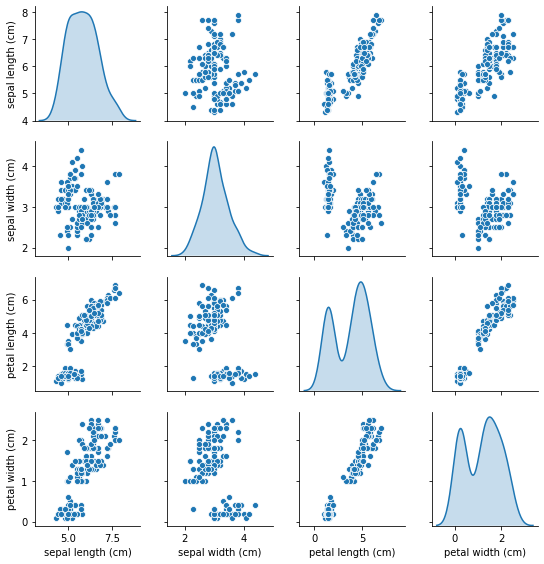

In [6]:
sns.pairplot(iris_df, height = 2, diag_kind = "kde")

From the above plots, we can say that there is a segmentation/grouping in our dataset.

#### Let's do heatmap plotting to visualisr correlation among features.

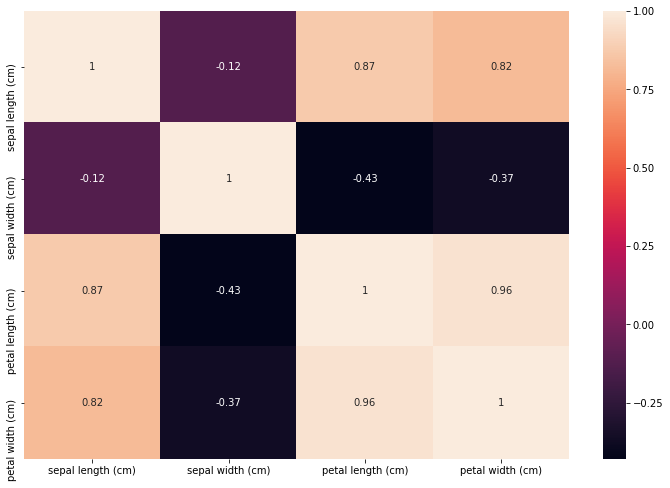

In [7]:
plt.figure(figsize = (10,7))

sns.heatmap(iris_df.corr(), annot = True)

plt.tight_layout()

#### Let's Train our K-Meand Clustering Model.

This algorithm devides the data in n observations into k clusters. It has 3 phases:
> <b>Initialisation:</b> K initial 'means'(centroids) are generated at random.  <br>
> <b>Assignment:</b> K cluster are created by associating each observation with nearest centroid. <br>
> <b>Update:</b> The centroid of the clusters becomes the new mean. <br>

<b> The end result is the sum of squared errors is minismised between points and their respecrive centroids.</b>
    
To find the optimum number of clusters for K-Means, we will be using one of the popular method called<b> The Elbow Method</b>.

In [8]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

In [9]:
from sklearn.cluster import KMeans

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

#### Plotting the results on a line graph, allowing to observe "The Elbow"

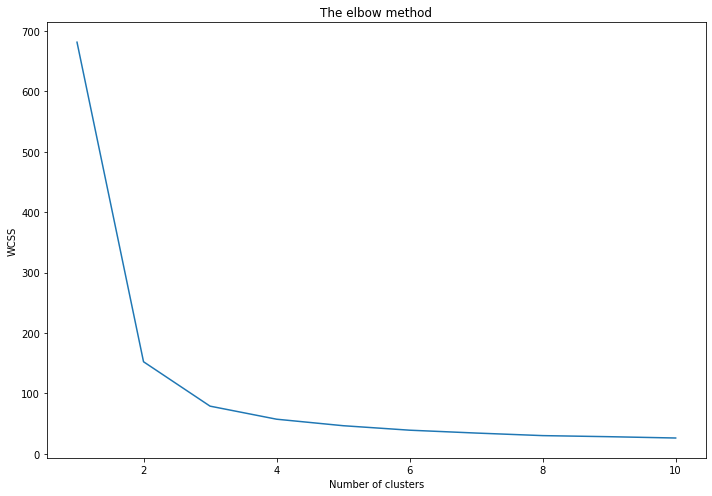

In [10]:
plt.figure(figsize=(10,7))

plt.plot(range(1, 11), wcss)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.tight_layout()

From above plot, we can see that the elbow occurs where there is optimum clusters formed. This happends when WCSS (Within Cluster sum of squares) dose not decrease significantly with every iteration.

Also, from the plot we can choose the number of cluster as <b> 3 </b>.

#### Applying K-Means to the dataset & making Predictions.

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Visualising the clusters for first two columns.

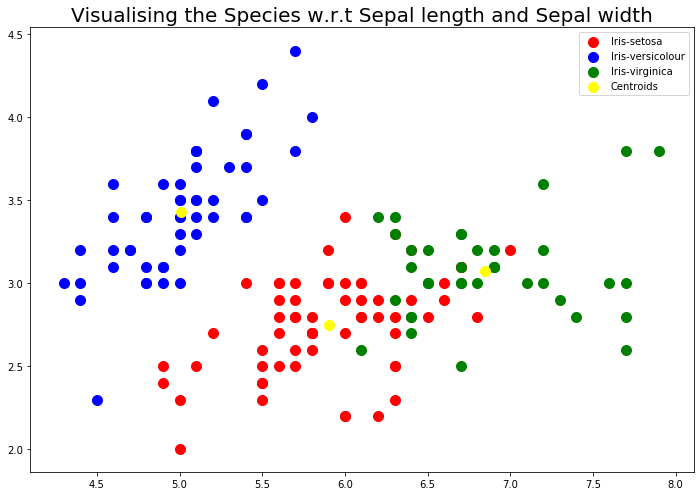

In [12]:
plt.figure(figsize = (10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Sepal length and Sepal width', fontsize=20)
plt.legend()
plt.tight_layout()

#### Visualising the cluster for last two columns.

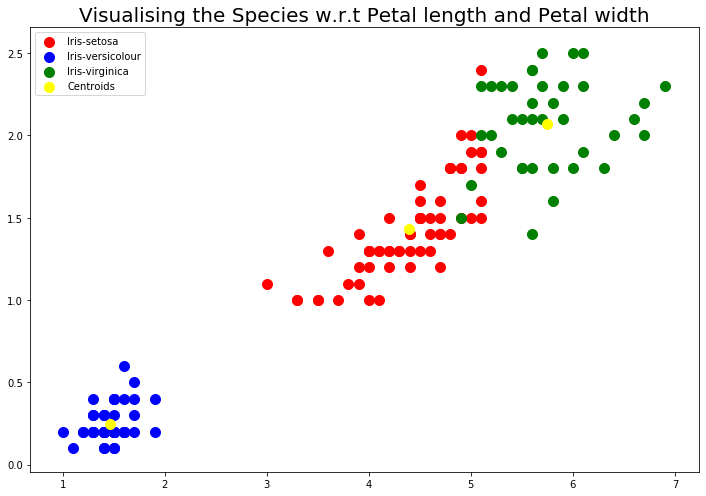

In [13]:
plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Petal length and Petal width', fontsize=20)
plt.legend()
plt.tight_layout()

## Conclusion:
> Hence we have explored Unsupervised Learning ML model for given dataset using K-Means Clustering method. <br>
> Also, predicted the <b>Optimum Number of Clusters and represnted them Visually using K-Means Clustering</b> method.